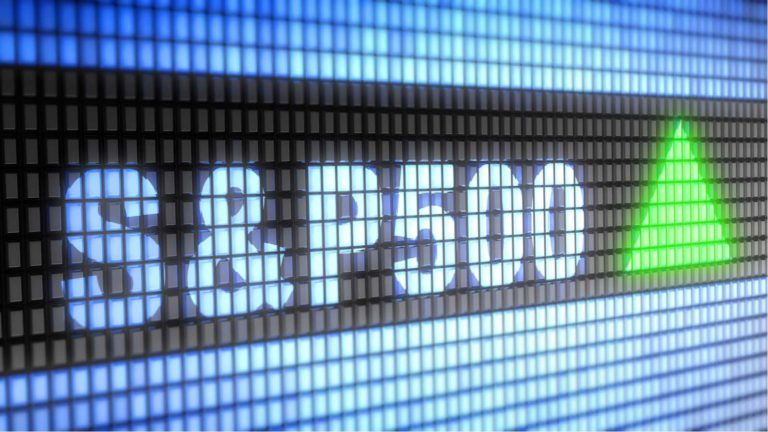

# INTRODUCTION

The goal of this kernel is to compare the top investment banks in S&P 500 namely JP Morgan, Bank of America, Citibank and Goldman Sachs. We will be seeing which bank has been showing a consistent profit over the past 5 years as compared to the other firms. I will also be hinting which firm is ideal for investing in 2021.


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import concat
import matplotlib
from sklearn.metrics import mean_squared_error
import os
import seaborn as sns
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**Importing Dataset**

Here, I will be displaying the last 5 values instead of the first 5 since the bottom values are of the year 2018. This dataset shows stock prices over the range of 5 years.

In [2]:
JPM = pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/JPM_data.csv')
BOA = pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/BAC_data.csv')
CITI = pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/C_data.csv')
GS = pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GS_data.csv')

In [3]:
JPM.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,115.77,116.985,115.480,116.87,13800613,JPM
1255,2018-02-02,116.49,116.920,114.090,114.28,16477307,JPM
1256,2018-02-05,113.00,114.590,103.980,108.80,30097591,JPM
1257,2018-02-06,106.85,112.480,106.610,112.11,33114833,JPM
1258,2018-02-07,111.55,114.450,111.146,112.87,21878324,JPM


In [4]:
BOA.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,32.00,32.50,31.96,32.50,62367448,BAC
1255,2018-02-02,32.44,32.67,31.86,31.95,96971924,BAC
1256,2018-02-05,31.12,31.98,29.15,30.26,155908256,BAC
1257,2018-02-06,29.41,31.29,29.30,31.20,165878399,BAC
1258,2018-02-07,31.12,31.74,30.86,31.25,101180515,BAC


In [5]:
CITI.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,78.27,79.230,78.14,79.20,12437151,C
1255,2018-02-02,78.65,79.060,76.88,77.02,18561206,C
1256,2018-02-05,75.52,77.225,72.20,73.27,31087807,C
1257,2018-02-06,71.52,75.190,71.15,74.82,32116677,C
1258,2018-02-07,74.77,76.075,74.32,74.99,18908378,C


In [6]:
GS.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,266.15,272.59,266.001,272.23,3388237,GS
1255,2018-02-02,270.00,271.75,259.350,260.04,5913920,GS
1256,2018-02-05,257.51,263.30,241.500,249.11,6528467,GS
1257,2018-02-06,244.21,258.75,242.110,258.70,6739908,GS
1258,2018-02-07,255.90,261.95,255.660,257.10,4125037,GS


Goldman Sachs has the highest stock price of $257.10 followed by JP Morgan. 2018 demonstrated a more bullish tone for Goldman. In fact, the firm had predicted the S&P 500 to close 2016 at just 2,400, a mark it passed in late May 2018 and never looked back.

In [7]:
JPM['date'] = pd.to_datetime(JPM['date'])
BOA['date'] = pd.to_datetime(BOA['date'])
CITI['date'] = pd.to_datetime(CITI['date'])
GS['date'] = pd.to_datetime(GS['date'])

In [8]:
JPM.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,67.617481,68.145050,67.098670,67.643233,1.658903e+07
std,15.741878,15.841308,15.676569,15.764154,6.638941e+06
min,46.790000,47.330000,46.050000,46.640000,3.680043e+06
25%,56.900000,57.460000,56.390000,56.980000,1.219469e+07
50%,61.690000,62.240000,61.200000,61.790000,1.508034e+07
75%,69.665000,70.417550,69.325000,69.955000,1.918785e+07
max,116.490000,117.352900,116.020000,116.870000,6.089110e+07


In [9]:
BOA.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,17.706624,17.866469,17.539186,17.704178,9.363380e+07
std,4.582069,4.614056,4.553340,4.586718,4.355989e+07
min,11.120000,11.220000,10.980000,11.030000,1.427357e+07
25%,14.675000,14.820000,14.535000,14.705000,6.518945e+07
50%,16.260000,16.390000,16.100000,16.250000,8.360430e+07
75%,18.195000,18.260000,18.040000,18.145000,1.074821e+08
max,32.440000,32.670000,32.180000,32.500000,3.750886e+08


In [10]:
CITI.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,53.464384,53.937349,52.990144,53.467951,2.068676e+07
std,8.671453,8.698223,8.659458,8.674791,9.211046e+06
min,36.000000,36.160000,34.520000,34.980000,4.671254e+06
25%,47.845000,48.235000,47.405000,47.790000,1.458615e+07
50%,51.620000,52.100000,51.090000,51.630000,1.838186e+07
75%,56.965000,57.330000,56.500000,57.045000,2.440245e+07
max,80.120000,80.700000,79.830000,80.080000,1.126010e+08


In [11]:
GS.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,187.491358,189.128046,185.901369,187.528459,3.249414e+06
std,31.868158,32.071826,31.644700,31.859654,1.468696e+06
min,139.010000,139.840000,137.290000,138.600000,6.977000e+05
25%,161.690000,163.330000,160.315000,161.785000,2.303850e+06
50%,178.750000,180.219000,177.250000,178.700000,2.935035e+06
75%,211.715000,213.490000,210.540000,212.235000,3.746456e+06
max,270.390000,273.790000,268.810000,272.480000,2.041020e+07


In [12]:
ib_list = ['JPM', 'BOA', 'CITI', 'GS']
ib_bank_list = [JPM, BOA, CITI, GS]
bank_name = ["JP Morgan", "Bank of America", "Citibank", "Goldman Sachs"]
for bank, firm_name in zip(ib_bank_list, bank_name):
    bank["bank_name"] = firm_name

# EXPLORATORY DATA ANALYSIS (EDA)

**Relationship between Opening & Closing Price USD($)**

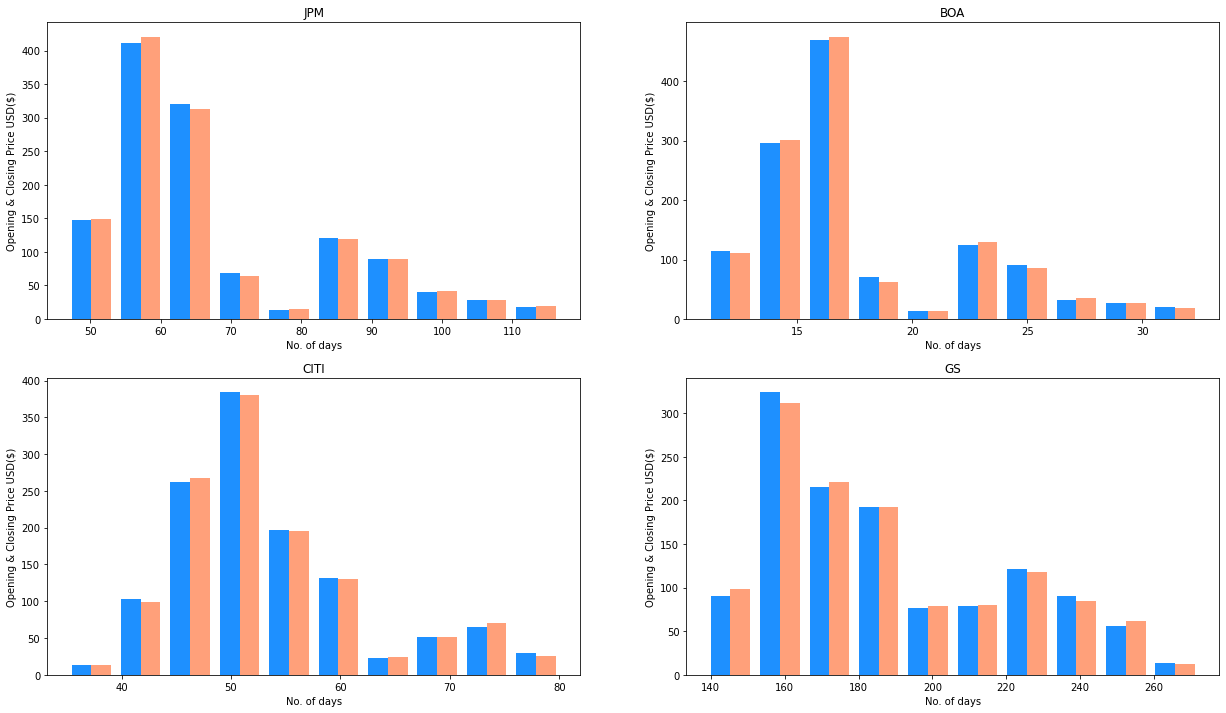

In [13]:
plt.figure(figsize = (21, 12))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    plt.hist([bank['open'], bank['close']], color = ["dodgerblue", "lightsalmon"])
    plt.ylabel("Opening & Closing Price USD($)")
    plt.xlabel("No. of days")
    plt.title(f"{ib_list[i - 1]}")

**Correlation of High & Low Stock Prices**

Relationship between High & Low Prices USD($)


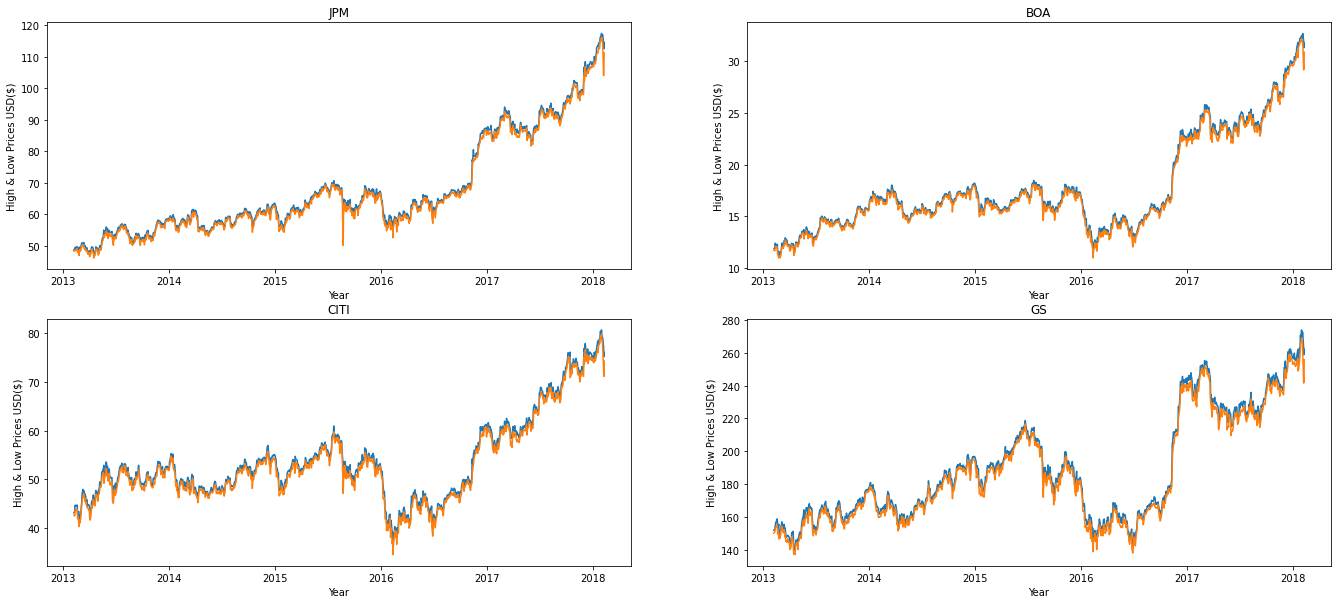

In [14]:
plt.figure(figsize = (23, 10))
print("Relationship between High & Low Prices USD($)")
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(bank['date'], bank[['high','low']])
    plt.xlabel("Year")
    plt.ylabel("High & Low Prices USD($)")
    plt.title(f"{ib_list[i - 1]}")

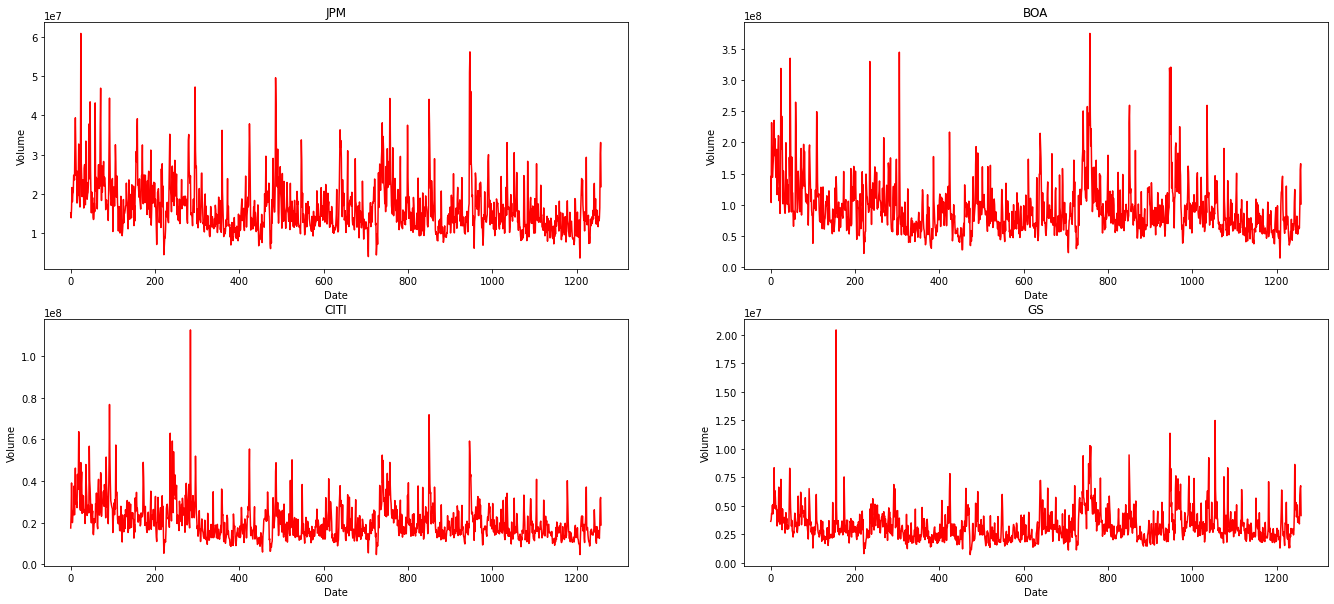

In [15]:
plt.figure(figsize = (23, 10))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    bank["volume"].plot(color = "red")
    plt.ylabel("Volume")
    plt.xlabel("Date")
    plt.title(f"{ib_list[i - 1]}")

**Correlation between Volume and High Price USD ($)**

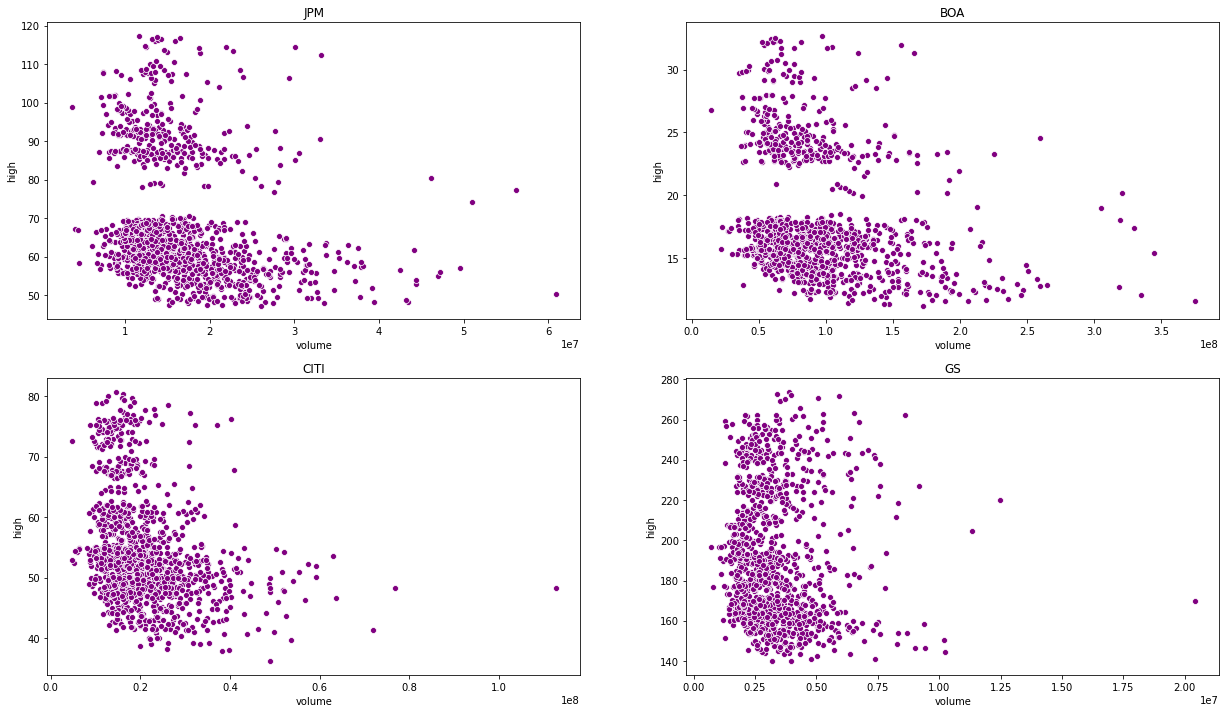

In [16]:
matplotlib.pyplot.figure(figsize = (21, 12))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x = bank['volume'], y = bank['high'], color = 'purple')
    plt.title(f"{ib_list[i - 1]}")   

Although volume has a negative correlation with high, low, opening and closing prices, volume turns out to be very useful to predict bullish signs. For instance, volume increases on a price decline and then the price moves higher, followed by a move back lower. If the price on the move back lower doesn't fall below the previous low, and volume is diminished on the second decline, then this is usually interpreted as a bullish sign. All these charts show more volume towards the lower spectrum of high price. 

**Daily Return**

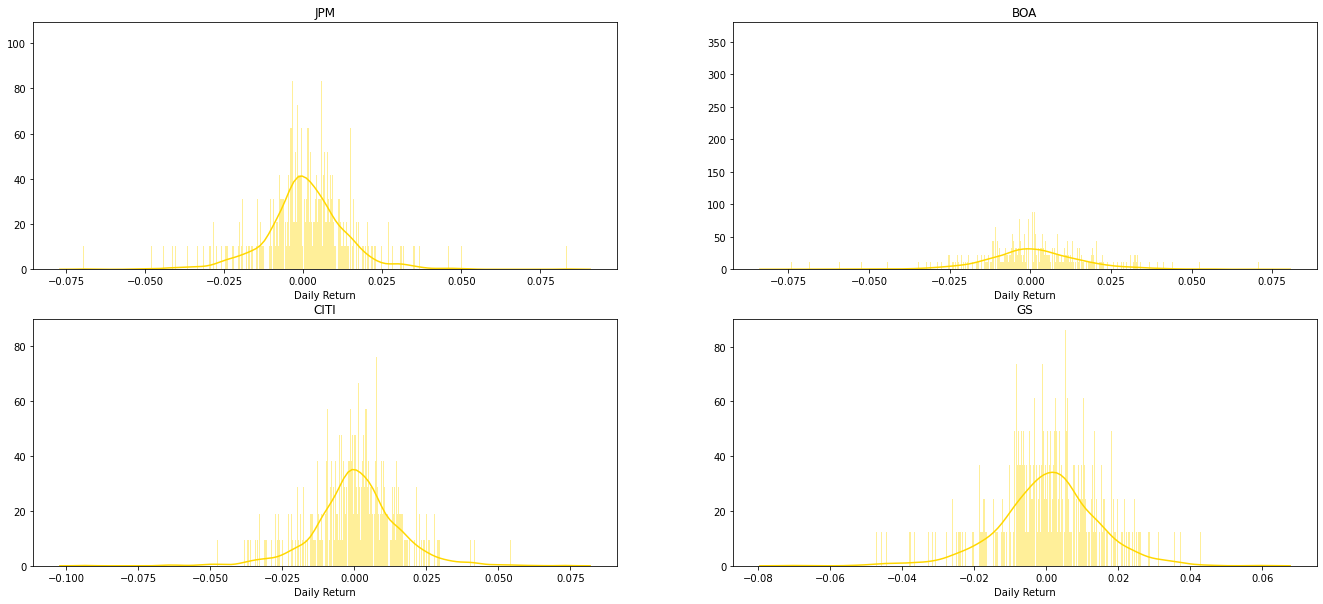

In [17]:
plt.figure(figsize = (23, 10))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    bank['Daily Return'] = bank['close'].pct_change()
    sns.distplot(bank['Daily Return'].dropna(),bins = 2000, color = "gold")
    plt.title(f"{ib_list[i - 1]}")
#plt.ioff()

In [18]:
data_JPM = concat([DataFrame(JPM['high'].values).shift(1), values], axis = 1)
data_JPM.columns, pred = ['t-1', 't+1'], []
X = data_JPM.values
train, test = X[1:len(X)-30], X[len(X)-30:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
def model_persistence(x):
    return x
for x in test_X:
    yhat = model_persistence(x)
    pred.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
reg_val, = plt.plot(pred, color = 'r',label = u'Predicted Linear')
true_val, = plt.plot(test_y,color = 'g', label = 'True Values')
plt.legend(handles = [true_val, reg_val])
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.show()

NameError: name 'values' is not defined